In [43]:
%matplotlib inline

import os 
from pathlib import Path
import cv2
import sys
from time import perf_counter
from itertools import compress
import matplotlib.pyplot as plt
from torchvision.io import read_video
import torchvision.transforms.functional as F

# data preparation
from siameseNet.dataset import *
from siameseNet.SiameseNetworkAPI import *

# pytracking's ToMP model
from pytracking.evaluation import Tracker

In [44]:
def _build_init_info(box):
    return {'init_bbox': box, 'init_object_ids': [1, ], 'object_ids': [1, ],
            'sequence_object_ids': [1, ]}

class tracker:
    def __init__(self):
        tracker_name = 'tomp'
        tracker_params = 'tomp101'
        tracker_creater = Tracker(tracker_name, tracker_params)
        params = tracker_creater.get_parameters()
        debug_ = getattr(params, 'debug', 0)
        params.debug = debug_
        params.tracker_name = tracker_name
        params.param_name = tracker_params
        print(params)
        tracker_creater._init_visdom(None, debug_)
        self.tracker = tracker_creater.create_tracker(params)
        self.output_boxes = []

    def _init(self, img, box):
        self.tracker.initialize(img, _build_init_info(box))
        self.output_boxes.append(box)

    def track(self, img, conf):
        frame = img.copy()
        out = self.tracker.track(frame)
        print(out)
        state = [int(s) for s in out['target_bbox']]
        score = out['object_presence_score']
        self.output_boxes.append(state)
        if score < conf:
            return False
        return True

using lin_sine as positional encoding
{'target_bbox': [686.360107421875, 437.82763671875, 433.06048583984375, 494.9088134765625], 'object_presence_score': 0.8185561299324036}
ToMP network predicted: False


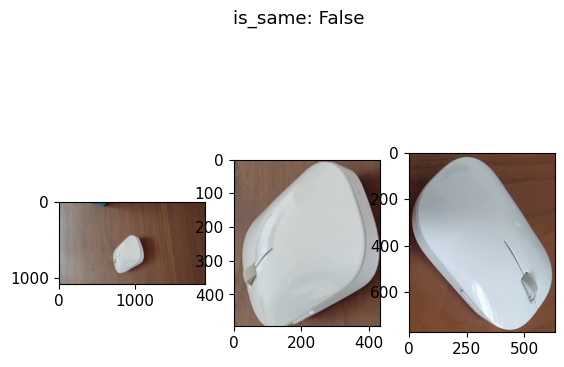

In [89]:
main_folder = 'C:/Users/Rachel/Documents/capstone/cp5105-capstone-proj/data/'
obj_path = main_folder+'inference_test/object/mouse2.jpg'
video_path = main_folder+'inference_test/video/room6.mp4'
frames, _, _ = read_video(str(video_path), output_format="TCHW", pts_unit='sec')

fno = 20
threshold = 0.9

test_image = np.array(frames[fno])

obj_img = read_image(str(obj_path))[:3, :, :].permute(0,2,1)

mytracker = tracker()
bbox = [0, 0, obj_img.shape[1], obj_img.shape[2]]
mytracker._init(obj_img.squeeze().permute(1,2,0).numpy(), bbox)
pred = mytracker.track(torch.from_numpy(test_image).squeeze().permute(1,2,0).numpy(), threshold)
x1, y1, x2, y2 = mytracker.output_boxes[-1]
print('ToMP network predicted:', pred)

fig, ax = plt.subplots(1, 3)
ax = ax.flatten()
ax[0].imshow(torch.from_numpy(test_image).permute(1,2,0))
ax[1].imshow(torch.from_numpy(test_image[:, y1:y1+y2, x1:x1+x2]).permute(1,2,0))
ax[2].imshow(obj_img.permute(1,2,0))
fig.suptitle(f'is_same: {pred}')
fig.show()

using lin_sine as positional encoding
{'target_bbox': [1038.23876953125, 572.7691650390625, 344.3165283203125, 409.686279296875], 'object_presence_score': 0.7973660826683044}
ToMP network predicted: False


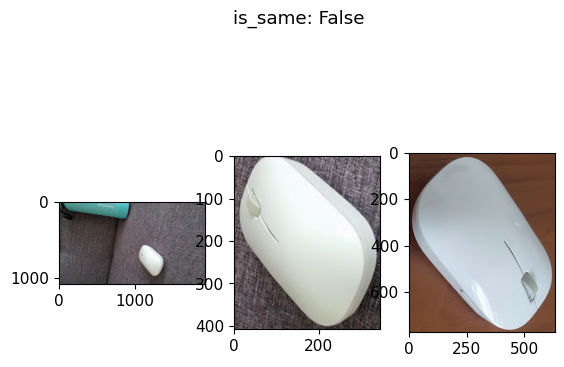

In [75]:
main_folder = 'C:/Users/Rachel/Documents/capstone/cp5105-capstone-proj/data/'
obj_path = main_folder+'inference_test/object/mouse2.jpg'
video_path = main_folder+'inference_test/video/room7.mp4'
frames, _, _ = read_video(str(video_path), output_format="TCHW", pts_unit='sec')

fno = 70
threshold = 0.9

test_image = np.array(frames[fno])

obj_img = read_image(str(obj_path))[:3, :, :].permute(0,2,1)

mytracker = tracker()
bbox = [0, 0, obj_img.shape[1], obj_img.shape[2]]
mytracker._init(obj_img.squeeze().permute(1,2,0).numpy(), bbox)
pred = mytracker.track(torch.from_numpy(test_image).squeeze().permute(1,2,0).numpy(), threshold)
x1, y1, x2, y2 = mytracker.output_boxes[-1]
print('ToMP network predicted:', pred)

fig, ax = plt.subplots(1, 3)
ax = ax.flatten()
ax[0].imshow(torch.from_numpy(test_image).permute(1,2,0))
ax[1].imshow(torch.from_numpy(test_image[:, y1:y1+y2, x1:x1+x2]).permute(1,2,0))
ax[2].imshow(obj_img.permute(1,2,0))
fig.suptitle(f'is_same: {pred}')
fig.show()

using lin_sine as positional encoding
{'target_bbox': [0.5, 448.745361328125, 1201.571533203125, 417.1099853515625], 'object_presence_score': 0.6371105909347534}
ToMP network predicted: False


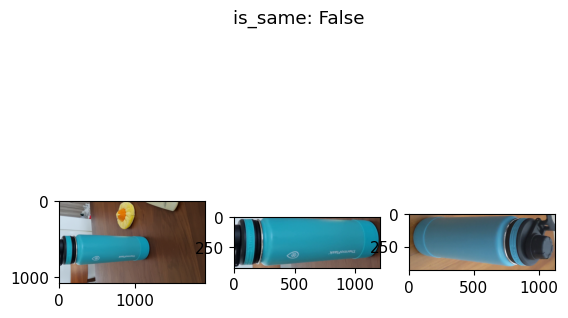

In [74]:
main_folder = 'C:/Users/Rachel/Documents/capstone/cp5105-capstone-proj/data/'
obj_path = main_folder+'inference_test/object/bottle18.jpg'
video_path = main_folder+'inference_test/video/room6.mp4'
frames, _, _ = read_video(str(video_path), output_format="TCHW", pts_unit='sec')

fno = 100
threshold = 0.9

test_image = np.array(frames[fno])

obj_img = read_image(str(obj_path))[:3, :, :].permute(0,2,1)

mytracker = tracker()
bbox = [0, 0, obj_img.shape[1], obj_img.shape[2]]
mytracker._init(obj_img.squeeze().permute(1,2,0).numpy(), bbox)
pred = mytracker.track(torch.from_numpy(test_image).squeeze().permute(1,2,0).numpy(), threshold)
x1, y1, x2, y2 = mytracker.output_boxes[-1]
print('ToMP network predicted:', pred)

fig, ax = plt.subplots(1, 3)
ax = ax.flatten()
ax[0].imshow(torch.from_numpy(test_image).permute(1,2,0))
ax[1].imshow(torch.from_numpy(test_image[:, y1:y1+y2, x1:x1+x2]).permute(1,2,0))
ax[2].imshow(obj_img.permute(1,2,0))
fig.suptitle(f'is_same: {pred}')
fig.show()

using lin_sine as positional encoding
{'target_bbox': [251.34939575195312, 244.20635986328125, 822.2538452148438, 508.24273681640625], 'object_presence_score': 0.7834449410438538}
ToMP network predicted: False


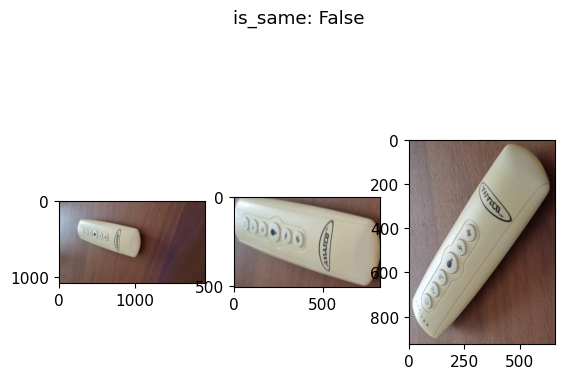

In [86]:
main_folder = 'C:/Users/Rachel/Documents/capstone/cp5105-capstone-proj/data/'
obj_path = main_folder+'inference_test/object/remote213.jpg'
video_path = main_folder+'inference_test/video/room0.mp4'
frames, _, _ = read_video(str(video_path), output_format="TCHW", pts_unit='sec')

fno = 60
threshold = 0.9

test_image = np.array(frames[fno])

obj_img = read_image(str(obj_path))[:3, :, :].permute(0,2,1)

mytracker = tracker()
bbox = [0, 0, obj_img.shape[1], obj_img.shape[2]]
mytracker._init(obj_img.squeeze().permute(1,2,0).numpy(), bbox)
pred = mytracker.track(torch.from_numpy(test_image).squeeze().permute(1,2,0).numpy(), threshold)
x1, y1, x2, y2 = mytracker.output_boxes[-1]
print('ToMP network predicted:', pred)

fig, ax = plt.subplots(1, 3)
ax = ax.flatten()
ax[0].imshow(torch.from_numpy(test_image).permute(1,2,0))
ax[1].imshow(torch.from_numpy(test_image[:, y1:y1+y2, x1:x1+x2]).permute(1,2,0))
ax[2].imshow(obj_img.permute(1,2,0))
fig.suptitle(f'is_same: {pred}')
fig.show()

using lin_sine as positional encoding
{'target_bbox': [1301.1650390625, 193.3660888671875, 456.556884765625, 326.6107177734375], 'object_presence_score': 0.778322160243988}
ToMP network predicted: False


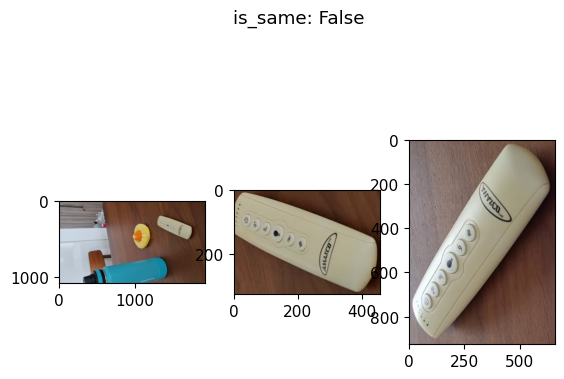

In [71]:
main_folder = 'C:/Users/Rachel/Documents/capstone/cp5105-capstone-proj/data/'
obj_path = main_folder+'inference_test/object/remote213.jpg'
video_path = main_folder+'inference_test/video/room6.mp4'
frames, _, _ = read_video(str(video_path), output_format="TCHW", pts_unit='sec')

fno = 150
threshold = 0.9

test_image = np.array(frames[fno])

obj_img = read_image(str(obj_path))[:3, :, :].permute(0,2,1)

mytracker = tracker()
bbox = [0, 0, obj_img.shape[1], obj_img.shape[2]]
mytracker._init(obj_img.squeeze().permute(1,2,0).numpy(), bbox)
pred = mytracker.track(torch.from_numpy(test_image).squeeze().permute(1,2,0).numpy(), threshold)
x1, y1, x2, y2 = mytracker.output_boxes[-1]
print('ToMP network predicted:', pred)

fig, ax = plt.subplots(1, 3)
ax = ax.flatten()
ax[0].imshow(torch.from_numpy(test_image).permute(1,2,0))
ax[1].imshow(torch.from_numpy(test_image[:, y1:y1+y2, x1:x1+x2]).permute(1,2,0))
ax[2].imshow(obj_img.permute(1,2,0))
fig.suptitle(f'is_same: {pred}')
fig.show()

using lin_sine as positional encoding
{'target_bbox': [686.360107421875, 437.82763671875, 433.06048583984375, 494.9088134765625], 'object_presence_score': 0.8185561299324036}
ToMP network predicted: False


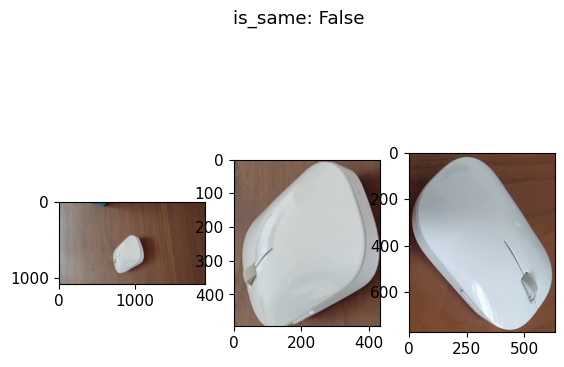

In [79]:
main_folder = 'C:/Users/Rachel/Documents/capstone/cp5105-capstone-proj/data/'
obj_path = main_folder+'inference_test/object/mouse2.jpg'
video_path = main_folder+'inference_test/video/room6.mp4'
frames, _, _ = read_video(str(video_path), output_format="TCHW", pts_unit='sec')

fno = 20
threshold = 0.9

test_image = np.array(frames[fno])

obj_img = read_image(str(obj_path))[:3, :, :].permute(0,2,1)

mytracker = tracker()
bbox = [0, 0, obj_img.shape[1], obj_img.shape[2]]
mytracker._init(obj_img.squeeze().permute(1,2,0).numpy(), bbox)
pred = mytracker.track(torch.from_numpy(test_image).squeeze().permute(1,2,0).numpy(), threshold)
x1, y1, x2, y2 = mytracker.output_boxes[-1]
print('ToMP network predicted:', pred)

fig, ax = plt.subplots(1, 3)
ax = ax.flatten()
ax[0].imshow(torch.from_numpy(test_image).permute(1,2,0))
ax[1].imshow(torch.from_numpy(test_image[:, y1:y1+y2, x1:x1+x2]).permute(1,2,0))
ax[2].imshow(obj_img.permute(1,2,0))
fig.suptitle(f'is_same: {pred}')
fig.show()

using lin_sine as positional encoding
{'target_bbox': [930.4224853515625, 364.4219970703125, 625.739013671875, 716.0780029296875], 'object_presence_score': 0.8324686288833618}
ToMP network predicted: False


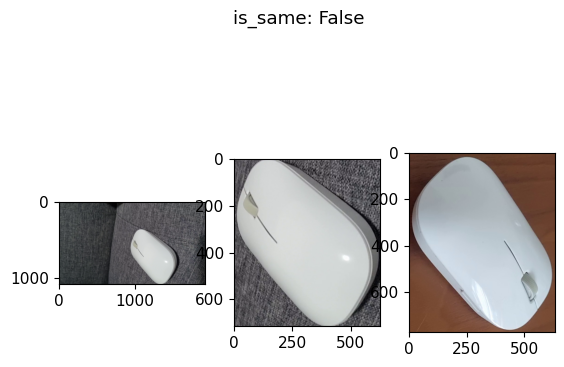

In [81]:
main_folder = 'C:/Users/Rachel/Documents/capstone/cp5105-capstone-proj/data/'
obj_path = main_folder+'inference_test/object/mouse2.jpg'
video_path = main_folder+'inference_test/video/room8.mp4'
frames, _, _ = read_video(str(video_path), output_format="TCHW", pts_unit='sec')

fno = 10
threshold = 0.9

test_image = np.array(frames[fno])

obj_img = read_image(str(obj_path))[:3, :, :].permute(0,2,1)

mytracker = tracker()
bbox = [0, 0, obj_img.shape[1], obj_img.shape[2]]
mytracker._init(obj_img.squeeze().permute(1,2,0).numpy(), bbox)
pred = mytracker.track(torch.from_numpy(test_image).squeeze().permute(1,2,0).numpy(), threshold)
x1, y1, x2, y2 = mytracker.output_boxes[-1]
print('ToMP network predicted:', pred)

fig, ax = plt.subplots(1, 3)
ax = ax.flatten()
ax[0].imshow(torch.from_numpy(test_image).permute(1,2,0))
ax[1].imshow(torch.from_numpy(test_image[:, y1:y1+y2, x1:x1+x2]).permute(1,2,0))
ax[2].imshow(obj_img.permute(1,2,0))
fig.suptitle(f'is_same: {pred}')
fig.show()

In [46]:
# all_img_of_obj = load_images_from_folder(obj_folder)
# model = SiameseNetworkAPI(all_img_of_obj, test_image)

# xy_coords, conf_scores = model.inference()
# print('objects found by yolov5', len(xy_coords))

# for i in range(len(xy_coords)): 
#     x1, y1, x2, y2 = [round(x.item()) for x in xy_coords[i]]
#     img = test_image[:, y1:y2, x1:x2]
#     plt.imshow(torch.from_numpy(img).permute(1,2,0))
#     plt.title(f'probability: {conf_scores[i].item()}')
#     plt.show()